In [5]:
!pip install yfinance pandas numpy matplotlib seaborn



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

        Date Symbol       Open       High        Low      Close  Adj Close  \
0 2020-01-02   AAPL  74.059998  75.150002  73.797501  75.087502  72.876099   
1 2020-01-03   AAPL  74.287498  75.144997  74.125000  74.357498  72.167610   
2 2020-01-06   AAPL  73.447502  74.989998  73.187500  74.949997  72.742653   
3 2020-01-07   AAPL  74.959999  75.224998  74.370003  74.597504  72.400536   
4 2020-01-08   AAPL  74.290001  76.110001  74.290001  75.797501  73.565193   

      Volume  
0  135480400  
1  146322800  
2  118387200  
3  108872000  
4  132079200  
Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')
Average Price Before Pandemic: 107.1118620554606
Average Price After Pandemic: 173.11098832340386


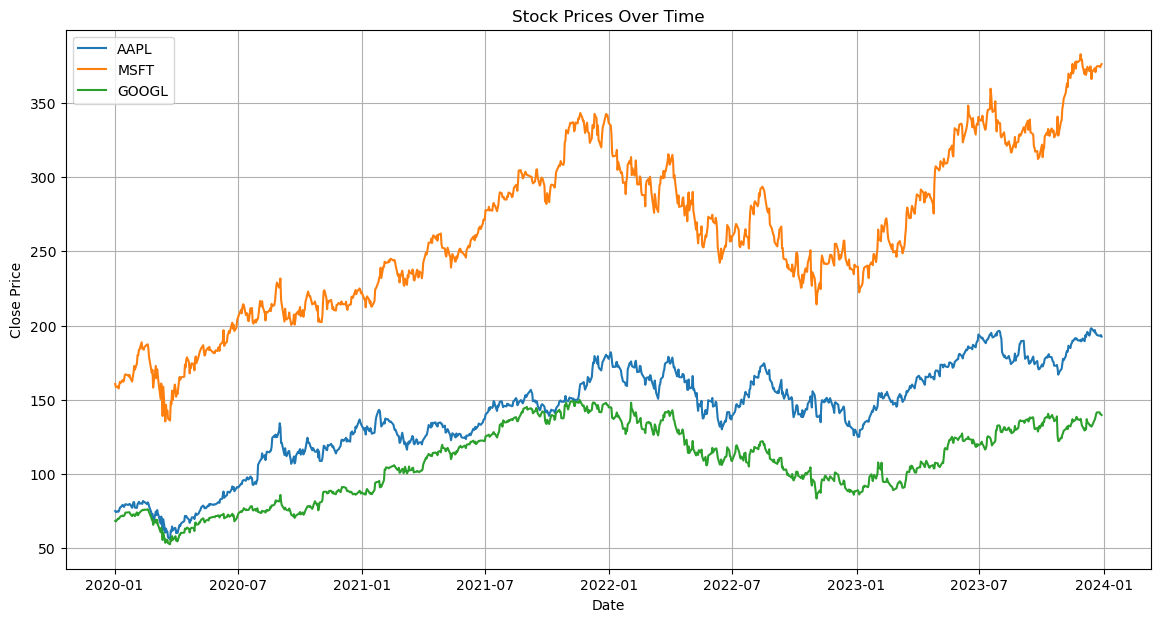

In [15]:
# Import necessary libraries
import yfinance as yf  # Library for fetching financial data from Yahoo Finance
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations

# Step 1: Define stock symbols to analyze
# Here, we specify the stock symbols we want to gather data for
symbols = ['AAPL', 'MSFT', 'GOOGL']  

# Step 2: Fetch historical data for the defined symbols
# Using a loop to download stock data for each symbol from Yahoo Finance
data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start='2020-01-01', end='2024-01-01')

# Step 3: Combine data into a single DataFrame
# Concatenate the individual stock DataFrames into a single DataFrame for easier analysis
combined_data = pd.concat(data, axis=0).reset_index(level=0).rename(columns={'level_0': 'Symbol'})

# Step 4: Reset index to turn the date index into a column
# This step ensures that the date becomes a regular column for filtering
combined_data.reset_index(inplace=True)

# Step 5: Check the structure of the combined DataFrame
# Displaying the first few rows and the columns to confirm the data structure
print(combined_data.head())
print(combined_data.columns)

# Step 6: Define the pandemic period
# Filtering the data to separate pre-pandemic and post-pandemic periods
pre_pandemic = combined_data[combined_data['Date'] < '2020-03-01']
post_pandemic = combined_data[combined_data['Date'] >= '2020-03-01']

# Step 7: Calculate average prices before and after the pandemic
# Using the 'Close' column to find the average stock price during these periods
avg_pre_pandemic = pre_pandemic['Close'].mean()  # Average price before the pandemic
avg_post_pandemic = post_pandemic['Close'].mean()  # Average price after the pandemic

# Step 8: Display results
# Printing the average prices to the console for comparison
print(f"Average Price Before Pandemic: {avg_pre_pandemic}")
print(f"Average Price After Pandemic: {avg_post_pandemic}")

# Step 9: Data Visualization
# Creating visualizations to illustrate stock performance and trends
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(combined_data[combined_data['Symbol'] == symbol]['Date'], 
             combined_data[combined_data['Symbol'] == symbol]['Close'], 
             label=symbol)

# Adding titles and labels to the plot
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [35]:

# Clean the data
combined_data.dropna(inplace=True)  # Drop rows with missing values

# Reset index for easier analysis
combined_data.reset_index(drop=True, inplace=True)

# Display the cleaned data
combined_data.info()
combined_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3018 non-null   datetime64[ns]
 1   Symbol     3018 non-null   object        
 2   Open       3018 non-null   float64       
 3   High       3018 non-null   float64       
 4   Low        3018 non-null   float64       
 5   Close      3018 non-null   float64       
 6   Adj Close  3018 non-null   float64       
 7   Volume     3018 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 188.8+ KB


,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,AAPL,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
1,2020-01-03,AAPL,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2,2020-01-06,AAPL,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
3,2020-01-07,AAPL,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
4,2020-01-08,AAPL,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [37]:
# Create price buckets for analysis
price_bins = [0, 50, 100, 150, 200, 300, 500, float('inf')]
price_labels = ['<50', '50-100', '100-150', '150-200', '200-300', '300-500', '>500']

# Add a new column for price buckets
combined_data['Price Bucket'] = pd.cut(combined_data['Close'], bins=price_bins, labels=price_labels)

# Group by symbols and price buckets
bucketed_data = combined_data.groupby(['Symbol', 'Price Bucket']).size().reset_index(name='Count')

# Display bucketed data
bucketed_data.head()


/var/folders/s7/dbcb9pbd689012hx3lw5jhb40000gn/T/ipykernel_93371/3562911433.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed_data = combined_data.groupby(['Symbol', 'Price Bucket']).size().reset_index(name='Count')


,Symbol,Price Bucket,Count
0,AAPL,<50,0
1,AAPL,50-100,146
2,AAPL,100-150,441
3,AAPL,150-200,419
4,AAPL,200-300,0


In [39]:
# Define the pandemic period
pre_pandemic = combined_data[combined_data['Date'] < '2020-03-01']
post_pandemic = combined_data[combined_data['Date'] >= '2020-03-01']

# Calculate average prices before and after the pandemic
avg_pre = pre_pandemic.groupby('Symbol')['Close'].mean()
avg_post = post_pandemic.groupby('Symbol')['Close'].mean()

# Create a DataFrame for comparison
stability_analysis = pd.DataFrame({'Average Pre-Pandemic': avg_pre, 'Average Post-Pandemic': avg_post})

# Calculate the change in performance
stability_analysis['Change'] = stability_analysis['Average Post-Pandemic'] - stability_analysis['Average Pre-Pandemic']

# Identify stable and unstable companies
stability_analysis['Stability'] = stability_analysis['Change'].apply(lambda x: 'Stable' if x >= 0 else 'Unstable')

# Display stability analysis results
stability_analysis


,Average Pre-Pandemic,Average Post-Pandemic,Change,Stability
Symbol,,,,
AAPL,77.902375,143.412924,65.510550,Stable
GOOGL,72.441962,109.337256,36.895293,Stable
MSFT,170.991249,266.582785,95.591536,Stable


<Figure size 1200x600 with 0 Axes>

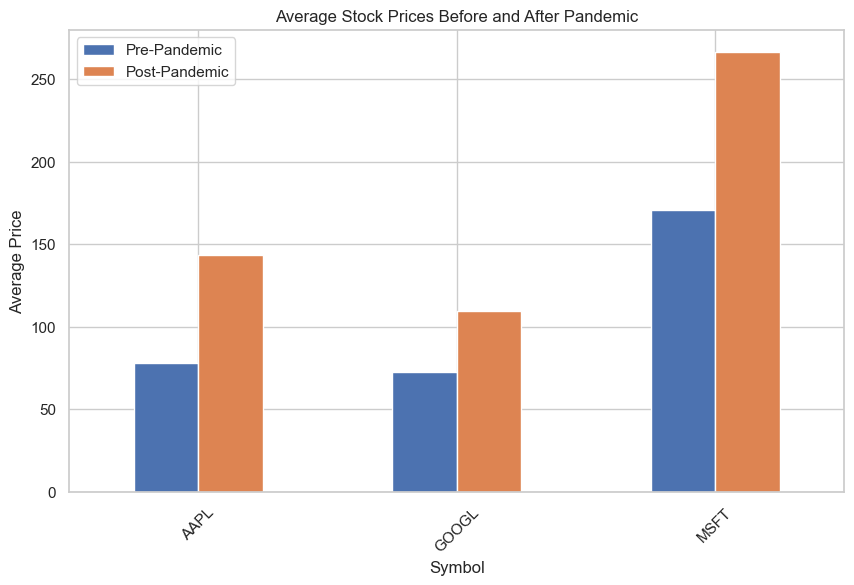

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style='whitegrid')

# Create a bar plot for average prices
plt.figure(figsize=(12, 6))
stability_analysis[['Average Pre-Pandemic', 'Average Post-Pandemic']].plot(kind='bar', figsize=(10, 6))
plt.title('Average Stock Prices Before and After Pandemic')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(['Pre-Pandemic', 'Post-Pandemic'])
plt.show()


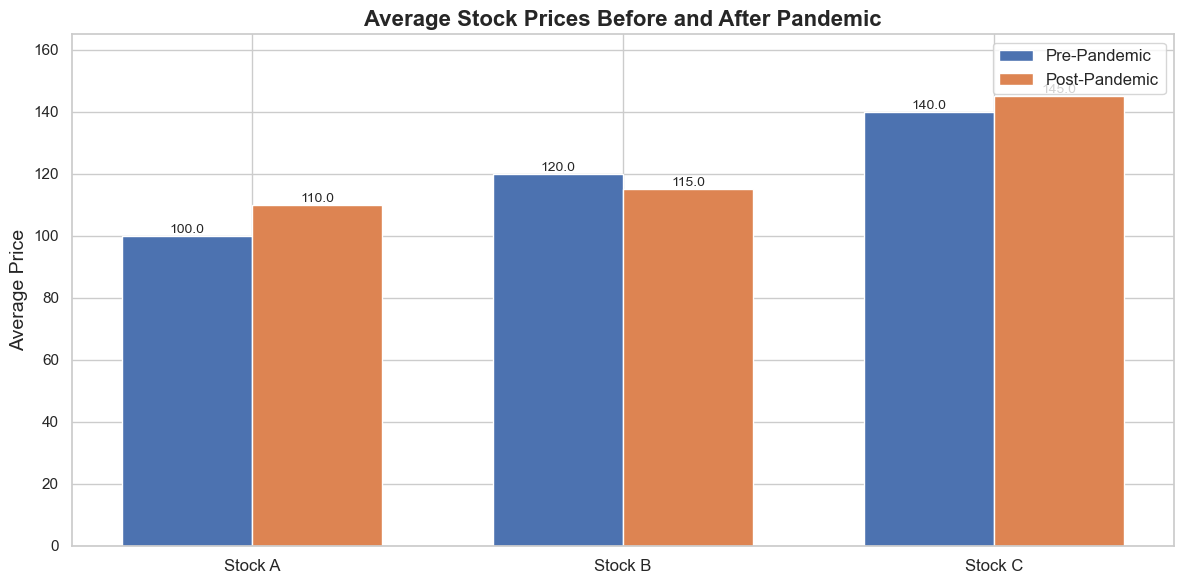

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data (replace this with your actual DataFrame)
data = {
    'Average Pre-Pandemic': [100, 120, 140],
    'Average Post-Pandemic': [110, 115, 145],
}
stability_analysis = pd.DataFrame(data, index=['Stock A', 'Stock B', 'Stock C'])

# Set the visual style
sns.set(style='whitegrid')

# Create a grouped bar plot
bar_width = 0.35  # Width of the bars
x = np.arange(len(stability_analysis))  # The label locations

# Create the bar plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, stability_analysis['Average Pre-Pandemic'], width=bar_width, label='Pre-Pandemic')
bars2 = plt.bar(x + bar_width/2, stability_analysis['Average Post-Pandemic'], width=bar_width, label='Post-Pandemic')

# Customize the plot
plt.title('Average Stock Prices Before and After Pandemic', fontsize=16, fontweight='bold')
plt.ylabel('Average Price', fontsize=14)
plt.xticks(x, stability_analysis.index, fontsize=12)  # Set x-tick labels to stock names
plt.legend(fontsize=12)
plt.ylim(0, stability_analysis.values.max() + 20)  # Adjust y-axis limits

# Add exact values on top of bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
